# Analysis

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_4.csv")
df

,dataset,backend,estimators,max_depth,accuracy,train_time,predict_time,threads,nodes
0,magic,seq,64,0,0.999685,31.41960,0.127184,1,1
1,magic,omp,64,0,0.999790,24.05580,0.099069,2,1
2,magic,omp,64,0,0.999842,12.60220,0.054829,4,1
3,magic,omp,64,0,0.999895,6.56916,0.031206,8,1
4,magic,omp,64,0,0.999632,3.28509,0.018452,16,1
5,magic,omp,64,0,0.999895,1.71026,0.014788,32,1
6,magic,ff,64,0,0.999790,1.67367,0.018352,32,1
7,magic,seq,128,0,1.000000,62.90630,0.251688,1,1
8,magic,omp,128,0,1.000000,48.11770,0.196123,2,1
9,magic,omp,128,0,1.000000,25.24730,0.106415,4,1


In [2]:
df256 = df[df["estimators"] == 64].sort_values(by=["threads", "backend"])
df256 = df256[["train_time", "threads", "backend"]]
df256

,train_time,threads,backend
0,31.41960,1,seq
1,24.05580,2,omp
2,12.60220,4,omp
3,6.56916,8,omp
4,3.28509,16,omp
6,1.67367,32,ff
5,1.71026,32,omp


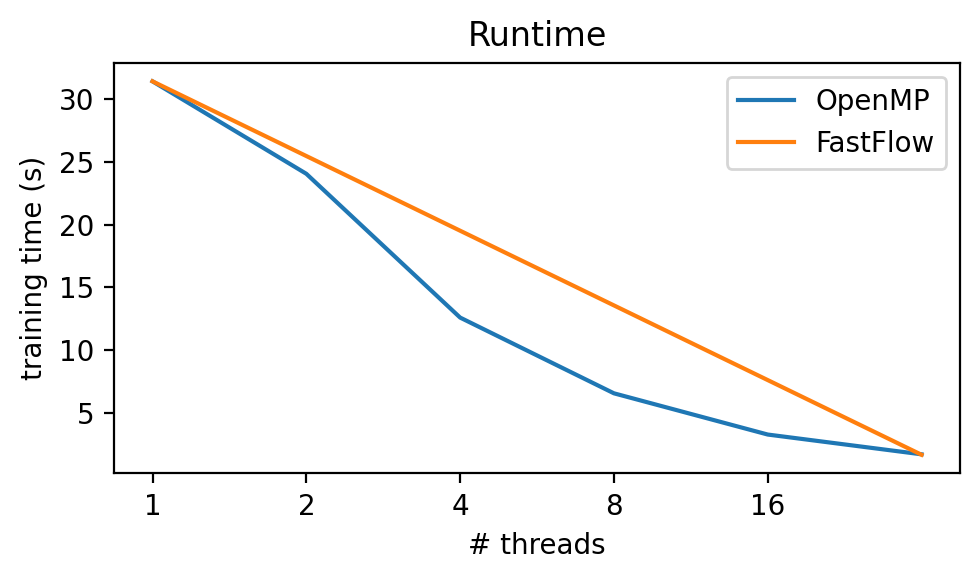

In [ ]:
import matplotlib.pyplot as plt


omp = df256[(df256["backend"] == "omp") | (df256["backend"] == "seq")]
ff = df256[(df256["backend"] == "ff") | (df256["backend"] == "seq")]

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Runtime")
plt.plot(omp["threads"], omp["train_time"], label="OpenMP")
plt.plot(ff["threads"], ff["train_time"], label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (s)")
plt.legend()
plt.tight_layout()
plt.show()

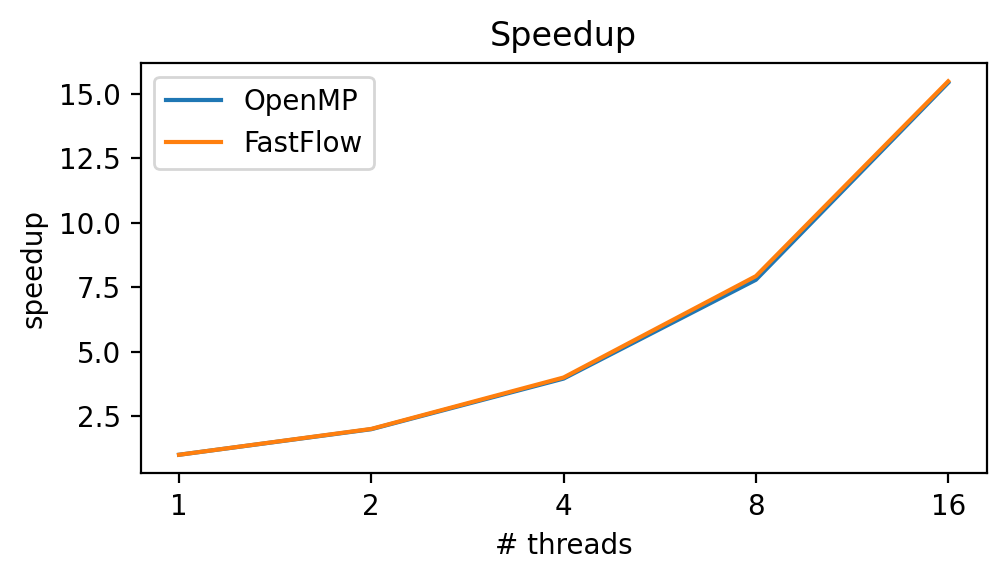

In [4]:
omp_s = df256[df256["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
ff_s = df256[df256["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

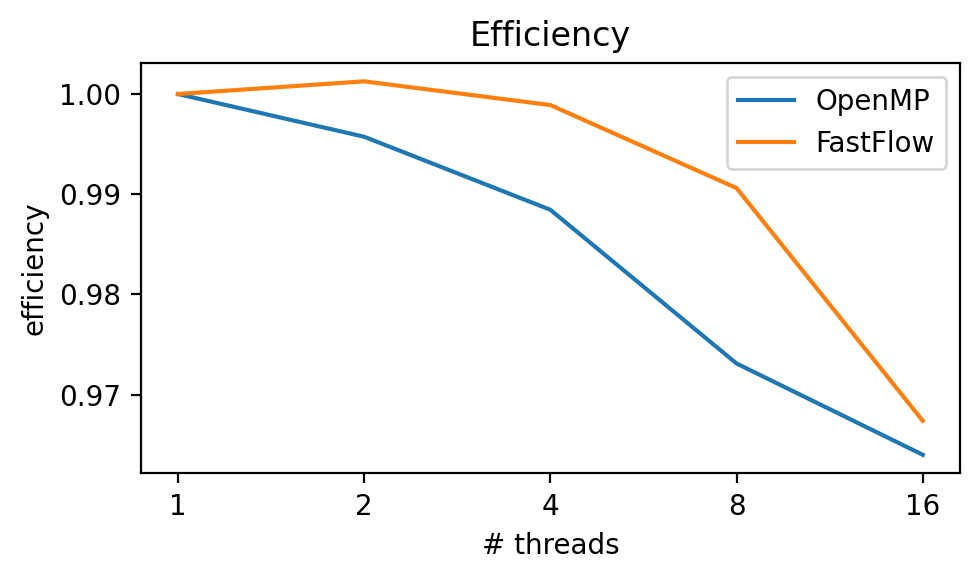

In [5]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
